In [1]:
# !pip install mosqito


[notice] A new release of pip available: 22.2.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy.io import wavfile as wav

from mosqito import COLORS
from mosqito.utils import load
from mosqito.sq_metrics import loudness_zwtv, loudness_zwst_perseg
from mosqito.sq_metrics import sharpness_din_st, sharpness_din_perseg, sharpness_din_from_loudness
from mosqito.sq_metrics import roughness_dw

## Loudness according to Zwicker method for time-varying signals

[Info] Signal resampled to 48 kHz to allow calculation.


Text(0, 0.5, 'Acoustic pressure [Pa]')

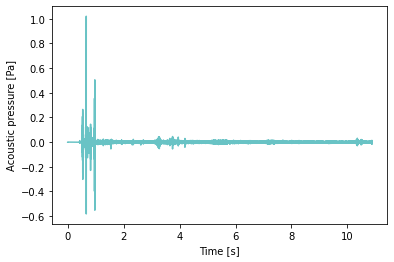

In [3]:
# load signal
sig, fs = load(path, wav_calib=2 * 2 **0.5)
# plot signal
t = np.linspace(0, (len(sig) - 1) / fs, len(sig))
plt.figure(1)
plt.plot(t, sig, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('Acoustic pressure [Pa]')

In [4]:
N, N_spec, bark_axis, time_axis = loudness_zwtv(sig, fs, field_type="free")

Text(0, 0.5, 'N_zwtv [sone]')

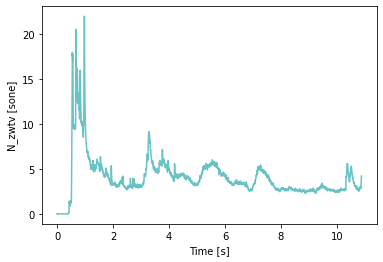

In [5]:
plt.figure(2)
plt.plot(time_axis, N, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('N_zwtv [sone]')

Text(0.5, 1.0, 't = 0.6 s')

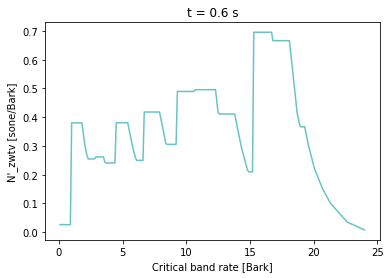

In [8]:
i_time = 300
plt.figure(3)
plt.plot(bark_axis, N_spec[:, i_time], color=COLORS[0])
plt.xlabel('Critical band rate [Bark]')
plt.ylabel("N'_zwtv [sone/Bark]")
plt.title("t = {:.1f} s".format(time_axis[i_time]))

Text(0.5, 1.0, 'Critical band rate = 12.1 Bark')

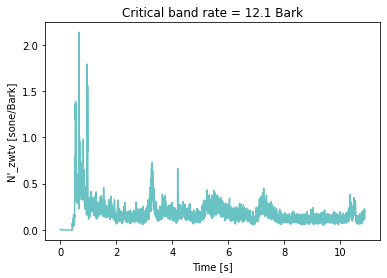

In [9]:
i_bark = 120
plt.figure(4)
plt.plot(time_axis, N_spec[i_bark, :], color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel("N'_zwtv [sone/Bark]")
plt.title("Critical band rate = {:.1f} Bark".format(bark_axis[i_bark]))

## Sharpness according to DIN method

In [10]:
sharpness = sharpness_din_st(sig, fs, weighting="din")
print("Sharpness = {:.1f} acum".format(sharpness) )

Sharpness = 1.8 acum


C:\Users\ddeng\anaconda3\lib\site-packages\mosqito\sq_metrics\sharpness\sharpness_din\sharpness_din_from_loudness.py:63: RuntimeWarning: invalid value encountered in true_divide
  z * 0.1, axis=0) / N


(0.0, 3.0)

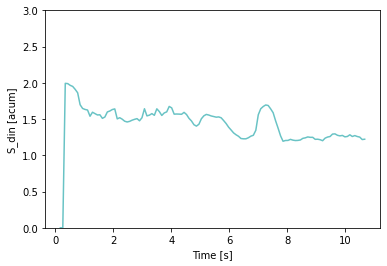

In [11]:
sharpness, time_axis = sharpness_din_perseg(sig, fs, nperseg=8192 * 2, noverlap=4096, weighting="din")
plt.figure(2)
plt.plot(time_axis, sharpness, color=COLORS[0])
plt.xlabel("Time [s]")
plt.ylabel("S_din [acum]")
plt.ylim((0, 3))

## Roughness according to Daniel and Weber method

In [12]:
r, r_spec, bark, time = roughness_dw(sig, fs, overlap=0)

Text(0, 0.5, 'Roughness [Asper]')

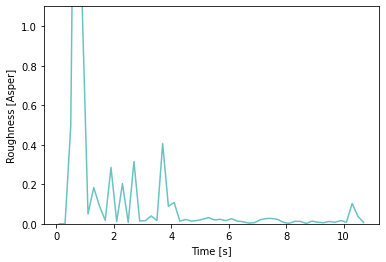

In [13]:
plt.figure(2)
plt.plot(time, r, color=COLORS[0])
plt.ylim(0,1.1)
plt.xlabel("Time [s]")
plt.ylabel("Roughness [Asper]")

## Analyze Comfortable and Uncomfortable Audio Files

In [2]:
basepath = '../Audio_Assessing/dataset/audio_wav'
pd_random_seed = 1
num = 10
df = pd.read_excel(os.path.join(basepath, 'linebot_data20221212.xlsx'))
df

,OBJECTID,FID_1,AudioFile_name,ID,User_id,Timestamp,Audio_content_Yamnet,Audio_content_User,Audio_class,DBA,...,Conscientiousness_BFI,Extraversion_BFI,Agreeableness_BFI,Negative Emotionality_BFI,NSS(Noise Sensitivity Scale),Max_LP,d_type,site_location,site_location2,ses_level
0,8,933,U8cd5fd6b52e3b5c9603db4c724d6ee44(2022-05-19 1...,902,U8cd5fd6b52e3b5c9603db4c724d6ee44,5/19/2022,車輛、公共汽車、鐵路交通,NaN,車輛、公共汽車、鐵路交通,65.85,...,0.0,0.0,0.0,0.0,0.0,1,2,室外_馬路旁,室外_交通相關,3
1,10,179,U5bf5273eb94dccdede5f5fd9ef509b06(2022-05-20 1...,1209,U5bf5273eb94dccdede5f5fd9ef509b06,5/20/2022,車輛、打印機、機制,#施工 裝潢,施工、裝潢,53.43,...,3.5,1.0,3.0,3.5,3.7,1,2,室內_住家,室內_住家或住宿,5
2,11,186,U1ec34c20faa76a50df1ec15876e6b498(2022-05-22 1...,1888,U1ec34c20faa76a50df1ec15876e6b498,5/22/2022,尖叫、家養動物、寵物、說話,NaN,尖叫、家養動物、寵物、說話,74.30,...,3.5,2.5,2.0,2.0,2.6,1,2,室內_住家,室內_住家或住宿,3
3,12,187,U5bf5273eb94dccdede5f5fd9ef509b06(2022-05-22 1...,1889,U5bf5273eb94dccdede5f5fd9ef509b06,5/22/2022,動物、說話、室內、小房間,#小孩哭鬧,小孩哭鬧,68.04,...,3.5,1.0,3.0,3.5,3.7,1,2,室內_住家,室內_住家或住宿,5
4,13,203,U5bf5273eb94dccdede5f5fd9ef509b06(2022-05-27 0...,2896,U5bf5273eb94dccdede5f5fd9ef509b06,5/27/2022,機制、白噪聲、嘶嘶聲,NaN,機制、白噪聲、嘶嘶聲,53.04,...,3.5,1.0,3.0,3.5,3.7,1,2,室內_住家,室內_住家或住宿,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10160,10670,10765,U9061674313c2bc5a29d6d196e5c9c8a1(2022-05-28 1...,3315,U9061674313c2bc5a29d6d196e5c9c8a1,5/28/2022,安靜、動物、鳥,NaN,安靜、動物、鳥,29.21,...,2.5,2.0,2.5,2.5,2.8,9,2,室外_鄉村田野自然地景,室外_其他,2
10161,10716,10681,U4f578c6856af541792a31ee25d973add(2022-06-17 1...,7364,U4f578c6856af541792a31ee25d973add,6/17/2022,風、風噪聲（麥克風）、車輛,#海邊聲音,海邊聲音,59.53,...,3.0,4.0,4.0,2.5,3.3,9,1,室外_偏安靜的休閒場所,室外_其他,3
10162,10726,10713,U4f578c6856af541792a31ee25d973add(2022-07-25 1...,11365,U4f578c6856af541792a31ee25d973add,7/25/2022,蛇、野生動物、動物,NaN,蛇、野生動物、動物,54.79,...,3.0,4.0,4.0,2.5,3.3,9,0,室外_偏安靜的休閒場所,室外_其他,3
10163,10768,10772,U83ec9e995efc5415b253d10fa9e9893d(2022-07-12 1...,9963,U83ec9e995efc5415b253d10fa9e9893d,7/12/2022,動物、戶外、鄉村或自然、野生動物,NaN,動物、戶外、鄉村或自然、野生動物,45.51,...,0.0,0.0,0.0,0.0,0.0,9,0,室外_鄉村田野自然地景,室外_其他,3


In [3]:
df['Feel_score'].value_counts()

3    5488
4    1947
2    1490
5     956
1     284
Name: Feel_score, dtype: int64

In [4]:
uncomfortable_df = df.loc[df['Feel_score']==1]
uncomfortable_df = uncomfortable_df.sample(num, random_state=pd_random_seed).reset_index(drop=True)
uncomfortable_df

,OBJECTID,FID_1,AudioFile_name,ID,User_id,Timestamp,Audio_content_Yamnet,Audio_content_User,Audio_class,DBA,...,Conscientiousness_BFI,Extraversion_BFI,Agreeableness_BFI,Negative Emotionality_BFI,NSS(Noise Sensitivity Scale),Max_LP,d_type,site_location,site_location2,ses_level
0,172,840,U4485aa5166cf4ddfef47f62b9224ee32(2022-06-02 0...,4469,U4485aa5166cf4ddfef47f62b9224ee32,6/2/2022,動物、野生動物、鳥,#怪手施工聲,怪手施工聲,45.87,...,2.5,3.0,2.0,2.5,2.6,6,2,室外_校園,室外_工作地或校園,3
1,969,175,U305abc97c823f7f55825a481d5446b13(2022-05-19 1...,980,U305abc97c823f7f55825a481d5446b13,5/19/2022,說話、心跳聲、心雜音,NaN,說話、心跳聲、心雜音,49.43,...,3.0,3.0,3.0,3.0,3.9,5,1,室內_住家,室內_住家或住宿,4
2,1639,1687,Ua1c3614605b21df13d60850bb1d15b46(2022-06-11 0...,6370,Ua1c3614605b21df13d60850bb1d15b46,6/11/2022,車輛、鐵路交通、火車,NaN,車輛、鐵路交通、火車,68.17,...,2.0,2.5,3.0,4.0,4.0,6,2,搭乘交通運輸工具_捷運,搭乘交通運輸工具_軌道,4
3,906,982,U32d95f90aac04388722047db1c1e9519(2022-06-14 1...,6943,U32d95f90aac04388722047db1c1e9519,6/14/2022,車輛、公共汽車、機動車（公路）,NaN,車輛、公共汽車、機動車（公路）,67.45,...,3.5,1.0,3.0,3.0,3.8,5,1,室外_馬路旁,室外_交通相關,3
4,92,225,Ue1e07fdd34c66090ffccdf050212da1e(2022-06-13 2...,6849,Ue1e07fdd34c66090ffccdf050212da1e,6/13/2022,安靜、說話、音樂,NaN,安靜、說話、音樂,39.36,...,2.0,3.5,3.0,3.5,3.9,5,1,室內_住家,室內_住家或住宿,3
5,545,237,U58da144f3fafd96ffbbc4f3bce9af113(2022-06-30 0...,8763,U58da144f3fafd96ffbbc4f3bce9af113,6/30/2022,蛇、野生動物、動物,#施工聲,施工聲,38.42,...,3.0,2.0,3.0,2.5,3.9,5,1,室內_住家,室內_住家或住宿,4
6,791,953,U68e66fc88cf77a1fa1821a5f8cc27ff5(2022-05-26 2...,2803,U68e66fc88cf77a1fa1821a5f8cc27ff5,5/26/2022,水、車輛、海洋,NaN,水、車輛、海洋,68.43,...,2.5,1.5,3.5,3.5,3.5,5,1,室外_馬路旁,室外_交通相關,4
7,1041,1550,Ue1e07fdd34c66090ffccdf050212da1e(2022-05-19 1...,887,Ue1e07fdd34c66090ffccdf050212da1e,5/19/2022,說話、收音機、室內、小房間,NaN,說話、收音機、室內、小房間,64.80,...,2.0,3.5,3.0,3.5,3.9,5,1,室內_偏吵雜的工作場所,室內_工作地或校園,3
8,641,773,U32d95f90aac04388722047db1c1e9519(2022-07-09 0...,9575,U32d95f90aac04388722047db1c1e9519,7/9/2022,車輛、鐵路交通、火車,NaN,車輛、鐵路交通、火車,68.86,...,3.5,1.0,3.0,3.0,3.8,5,1,室外_車站,室外_交通相關,3
9,1441,1678,Ua1c3614605b21df13d60850bb1d15b46(2022-05-20 1...,1294,Ua1c3614605b21df13d60850bb1d15b46,5/20/2022,車輛、鐵路交通、火車,NaN,車輛、鐵路交通、火車,67.19,...,2.0,2.5,3.0,4.0,4.0,3,1,搭乘交通運輸工具_捷運,搭乘交通運輸工具_軌道,4


In [5]:
comfortable_df = df.loc[df['Feel_score']==5]
comfortable_df = comfortable_df.sample(num, random_state=pd_random_seed).reset_index(drop=True)
comfortable_df

,OBJECTID,FID_1,AudioFile_name,ID,User_id,Timestamp,Audio_content_Yamnet,Audio_content_User,Audio_class,DBA,...,Conscientiousness_BFI,Extraversion_BFI,Agreeableness_BFI,Negative Emotionality_BFI,NSS(Noise Sensitivity Scale),Max_LP,d_type,site_location,site_location2,ses_level
0,9505,10320,U5bf5273eb94dccdede5f5fd9ef509b06(2022-07-21 2...,11026,U5bf5273eb94dccdede5f5fd9ef509b06,7/21/2022,動物、昆蟲、野生動物,NaN,動物、昆蟲、野生動物,47.92,...,3.5,1.0,3.0,3.5,3.7,1,2,室外_馬路旁,室外_交通相關,5
1,10742,10667,U8cd5fd6b52e3b5c9603db4c724d6ee44(2022-06-01 1...,4339,U8cd5fd6b52e3b5c9603db4c724d6ee44,6/1/2022,安靜、室內、小房間、咬,NaN,安靜、室內、小房間、咬,28.55,...,0.0,0.0,0.0,0.0,0.0,7,0,室內_偏安靜的休閒場所,室內_其他,3
2,8560,9173,Ufb677f650ea1b5e60edff505db0d5140(2022-05-20 1...,1251,Ufb677f650ea1b5e60edff505db0d5140,5/20/2022,安靜、室內、小房間、說話,NaN,安靜、室內、小房間、說話,23.01,...,0.0,0.0,0.0,0.0,0.0,5,1,室內_住家,室內_住家或住宿,4
3,9801,10295,U4f578c6856af541792a31ee25d973add(2022-07-15 1...,10336,U4f578c6856af541792a31ee25d973add,7/15/2022,車輛、飛行器、直升機,NaN,車輛、飛行器、直升機,63.79,...,3.0,4.0,4.0,2.5,3.3,4,0,室外_馬路旁,室外_交通相關,3
4,10729,10704,U4f578c6856af541792a31ee25d973add(2022-07-21 1...,10979,U4f578c6856af541792a31ee25d973add,7/21/2022,動物、戶外、鄉村或自然、牲畜、農場動物、役用動物,NaN,動物、戶外、鄉村或自然、牲畜、農場動物、役用動物,69.03,...,3.0,4.0,4.0,2.5,3.3,2,2,室外_偏安靜的休閒場所,室外_其他,3
5,9685,10177,U985fa4d251a0b428e624aa3b0141dd08(2022-06-03 1...,4783,U985fa4d251a0b428e624aa3b0141dd08,6/3/2022,動物、戶外、鄉村或自然、野生動物,NaN,動物、戶外、鄉村或自然、野生動物,43.34,...,3.0,2.5,3.0,3.5,2.9,2,2,室外_馬路旁,室外_交通相關,4
6,10177,10505,Ucd4523cc53999ea6b743004bcd82a87e(2022-05-17 1...,421,Ucd4523cc53999ea6b743004bcd82a87e,5/17/2022,說話、室內、小房間、機械風扇,NaN,說話、室內、小房間、機械風扇,37.51,...,0.0,0.0,0.0,0.0,0.0,6,2,室內_偏安靜的工作場所,室內_工作地或校園,3
7,10125,9533,U88568b23b84ed52c2cdb03403d48c698(2022-06-25 1...,8237,U88568b23b84ed52c2cdb03403d48c698,6/25/2022,安靜、室內、小房間、打鉤,NaN,安靜、室內、小房間、打鉤,26.79,...,3.0,2.0,3.5,3.0,3.8,1,2,室內_住家,室內_住家或住宿,3
8,9290,10243,U5bf5273eb94dccdede5f5fd9ef509b06(2022-06-25 1...,8256,U5bf5273eb94dccdede5f5fd9ef509b06,6/25/2022,動物、戶外、鄉村或自然、野生動物,NaN,動物、戶外、鄉村或自然、野生動物,42.83,...,3.5,1.0,3.0,3.5,3.7,1,2,室外_馬路旁,室外_交通相關,5
9,9340,10206,U5bf5273eb94dccdede5f5fd9ef509b06(2022-06-11 0...,6374,U5bf5273eb94dccdede5f5fd9ef509b06,6/11/2022,動物、室內、小房間、野生動物,#水聲 蛙鳴,水聲、蛙鳴,41.39,...,3.5,1.0,3.0,3.5,3.7,1,2,室外_馬路旁,室外_交通相關,5


In [6]:
uncomfortable_scores = []
for i in tqdm(range(num)):
    scores = []
    filename = uncomfortable_df['AudioFile_name'][i]
    path = os.path.join(basepath, filename+'.wav')
    sig, fs = load(path, wav_calib=2 * 2 **0.5)
    
    # Loudness
    N, N_spec, bark_axis, time_axis = loudness_zwtv(sig, fs, field_type="free")
    scores.append(np.quantile(N, .10))
    scores.append(np.quantile(N, .50))
    scores.append(np.quantile(N, .90))
    
    # Sharpness
    sharpness, time_axis = sharpness_din_perseg(sig, fs, nperseg=8192 * 2, noverlap=4096, weighting="din")
    scores.append(np.quantile(sharpness, .10))
    scores.append(np.quantile(sharpness, .50))
    scores.append(np.quantile(sharpness, .90))
    
    # Roughness
    r, r_spec, bark, time = roughness_dw(sig, fs, overlap=0)
    scores.append(np.quantile(r, .10))
    scores.append(np.quantile(r, .50))
    scores.append(np.quantile(r, .90))
    
    uncomfortable_scores.append(scores)
    
uncomfortable_scores

  0%|          | 0/10 [00:00<?, ?it/s]

[Info] Signal resampled to 48 kHz to allow calculation.


C:\Users\ddeng\anaconda3\lib\site-packages\mosqito\sq_metrics\sharpness\sharpness_din\sharpness_din_from_loudness.py:63: RuntimeWarning: invalid value encountered in true_divide
  z * 0.1, axis=0) / N
 10%|█         | 1/10 [01:23<12:27, 83.11s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 20%|██        | 2/10 [02:22<09:12, 69.09s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 30%|███       | 3/10 [05:22<13:57, 119.62s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 40%|████      | 4/10 [06:50<10:44, 107.47s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 50%|█████     | 5/10 [07:40<07:12, 86.49s/it] 

[Info] Signal resampled to 48 kHz to allow calculation.


 60%|██████    | 6/10 [08:40<05:10, 77.64s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 70%|███████   | 7/10 [09:38<03:33, 71.26s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 80%|████████  | 8/10 [10:52<02:23, 71.97s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 90%|█████████ | 9/10 [12:18<01:16, 76.33s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


100%|██████████| 10/10 [13:25<00:00, 80.57s/it]


[[9.460649472083333,
  10.990319227395721,
  13.003116629031192,
  1.385530675480331,
  1.4479096863932133,
  1.565976834642096,
  0.013547192358983376,
  0.02813964200952578,
  0.05804627582646149],
 [7.926700816565224,
  10.647615584236425,
  15.168611258028479,
  0.8083109332372955,
  1.047197180314205,
  1.1560516801528546,
  0.02431144494058192,
  0.06160287421511293,
  0.16789001760529326],
 [34.60271097221619,
  45.97003040116599,
  49.549112751476834,
  0.9858921726001384,
  1.0509027395160908,
  1.1446219366618673,
  0.05150500011452661,
  0.0834059789467459,
  0.13002634382381117],
 [33.65172972927661,
  44.58391412109822,
  55.20967532671914,
  1.1424531739821668,
  1.2279949838434128,
  1.3159090262658915,
  0.04748168161734026,
  0.08347017340376144,
  0.12956475245214363],
 [2.7887520404795656,
  5.066254487711088,
  8.444545185147822,
  0.9969633600370515,
  1.1335534145906248,
  1.3286684779575892,
  0.005389584639252468,
  0.01697917030873171,
  0.047290375546309237],


In [7]:
comfortable_scores = []
for i in tqdm(range(num)):
    scores = []
    filename = comfortable_df['AudioFile_name'][i]
    path = os.path.join(basepath, filename+'.wav')
    sig, fs = load(path, wav_calib=2 * 2 **0.5)
    
    # Loudness
    N, N_spec, bark_axis, time_axis = loudness_zwtv(sig, fs, field_type="free")
    scores.append(np.quantile(N, .10))
    scores.append(np.quantile(N, .50))
    scores.append(np.quantile(N, .90))
    
    # Sharpness
    sharpness, time_axis = sharpness_din_perseg(sig, fs, nperseg=8192 * 2, noverlap=4096, weighting="din")
    scores.append(np.quantile(sharpness, .10))
    scores.append(np.quantile(sharpness, .50))
    scores.append(np.quantile(sharpness, .90))
    
    # Roughness
    r, r_spec, bark, time = roughness_dw(sig, fs, overlap=0)
    scores.append(np.quantile(r, .10))
    scores.append(np.quantile(r, .50))
    scores.append(np.quantile(r, .90))
    
    comfortable_scores.append(scores)
    
comfortable_scores

  0%|          | 0/10 [00:00<?, ?it/s]

[Info] Signal resampled to 48 kHz to allow calculation.


 10%|█         | 1/10 [02:33<23:00, 153.36s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 20%|██        | 2/10 [03:34<13:14, 99.27s/it] 

[Info] Signal resampled to 48 kHz to allow calculation.


 30%|███       | 3/10 [03:59<07:37, 65.38s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 40%|████      | 4/10 [04:58<06:16, 62.68s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 50%|█████     | 5/10 [06:03<05:17, 63.49s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 60%|██████    | 6/10 [07:02<04:08, 62.04s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 70%|███████   | 7/10 [07:57<02:58, 59.64s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 80%|████████  | 8/10 [09:03<02:03, 61.78s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


 90%|█████████ | 9/10 [10:41<01:13, 73.17s/it]

[Info] Signal resampled to 48 kHz to allow calculation.


100%|██████████| 10/10 [12:41<00:00, 76.14s/it]


[[7.700274082846794,
  10.04100740720287,
  13.530800684592572,
  1.297627762184083,
  1.7461282987894526,
  2.039510234232625,
  0.11399949440711588,
  0.24738325767582456,
  0.6728610480453497],
 [2.590581702391539,
  2.916730890777825,
  3.4588360425850135,
  1.0299433332308445,
  1.0589607495956612,
  1.2048249187915547,
  0.004901730957499299,
  0.012144814012478819,
  0.1428452276922449],
 [0.5262666986671277,
  2.0246887195641783,
  2.7557686117322384,
  0.8800883747991022,
  0.9117882688096297,
  0.9327250089923583,
  0.0014418455638682795,
  0.013801122313759724,
  0.040321088895274575],
 [37.051409693656346,
  39.267978055863274,
  46.519136876662515,
  1.136553397841013,
  1.1644715246146415,
  1.233810670413931,
  0.10896750014276271,
  0.1648712865459216,
  0.21281772545052247],
 [18.29690521564405,
  30.626995425248396,
  49.11948611724089,
  0.7264803848379843,
  0.8212085606712641,
  1.0835100920842549,
  0.2002555218809496,
  0.702578942955123,
  1.2960565912107669],
 

In [13]:
uncomfort_df = pd.DataFrame(uncomfortable_scores, columns=['Loudness90', 'Loudness50', 'Loudness10', 
                                                           'Sharpness90', 'Sharpness50', 'Sharpness10',
                                                           'Roughness90', 'Roughness50', 'Roughness10'])
uncomfort_df.loc['mean'] = uncomfort_df.mean()
uncomfort_df.to_excel("Uncomfortable.xlsx")  

In [14]:
comfort_df = pd.DataFrame(comfortable_scores, columns=['Loudness90', 'Loudness50', 'Loudness10',
                                                       'Sharpness90', 'Sharpness50', 'Sharpness10',
                                                       'Roughness90', 'Roughness50', 'Roughness10'])
comfort_df.loc['mean'] = comfort_df.mean()
comfort_df.to_excel("Comfortable.xlsx")  